In [13]:
import random
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import time
from IPython.display import clear_output

# Red Neuronal (3 neuronas capa unica)

Para un mallado 2d

In [14]:
#GENERACION DE DATOS
#Genera los valores (X,Y) que entraran en la funcion Z
_X, _Y = np.linspace(-1, 1, 25), np.linspace(-1, 1, 25)
X, Y = np.meshgrid(_X, _Y) 

#Funcion Z
#z = lambda x,y: np.sin( (0.2*(X-1/2)**2) + (0.2*(Y-1/4)**2) ) 
z = lambda x,y: np.sin( (0.2*(X)) + (0.4*(Y)) ) 
Z = z(X,Y)

#Agrega ruido a  Z
for i in range(len(X)):
    for l in range(len(X)):
       
        Z[i][l] = Z[i][l] + ( (-1)**( (i%2)+2) ) * 0.01*random.random() + ( (-1)**( (l%2)+2) ) * 0.01*random.random()

In [15]:
#Funcion de activacion y derivada
fa = (lambda x: 1/(1+np.e**(-x)),
      lambda x: np.e**(-x)/(1+np.e**(-x)) **2  )

#Error cuadratico y derivada
error = (lambda a,_z:  (a - _z)**2, 
         lambda a,_z:  2*(a - _z) ) 

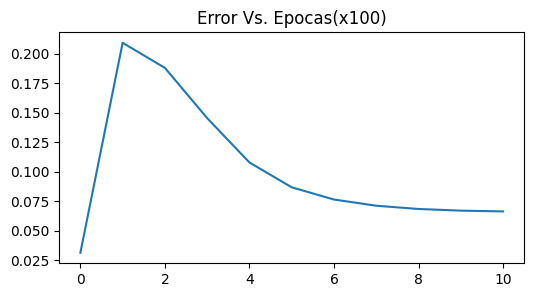

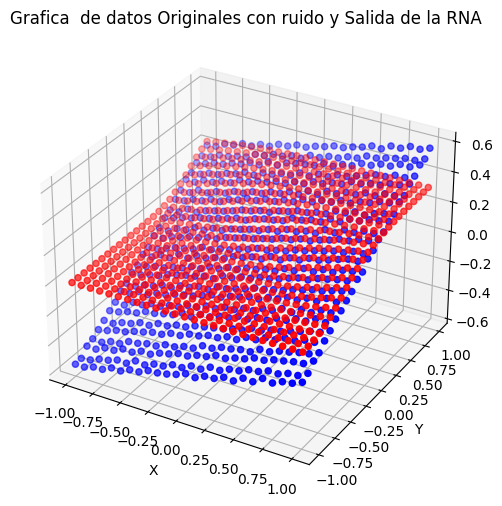

In [16]:
#Se inicializan los valores de W y B
#Primera Capa
w111=0.25;w112=-0.45;w113=-0.15;w121=0.33;w122=-0.42;w123=-0.78 
b11=0.35;b12=-0.65;b13=-0.87
#Segunda Capa
w211=0.32;w221=-0.15;w231=-0.78
b21=-0.35

EPOCH = 1000
e=[]
for j in range(EPOCH+1):

 for i in range(len(X)):
     for l in range(len(X)):
#Forward Pass
#primera Capa
        z11 = (w111*X[i][l]) + (w121*Y[i][l]) + b11
        z12 = (w112*X[i][l]) + (w122*Y[i][l]) + b12 
        z12 = (w113*X[i][l]) + (w123*Y[i][l]) + b13

        a11 = fa[0](z11)
        a12 = fa[0](z12)
        a13 = fa[0](z12)

#segunda Capa - Salida
        z21 = (w211*a11) + (w221*a12) + (w231*a13) + b21
        a21 = fa[0](z21)
        e1=error[0](a21,Z[i][l])
#Back-Propagation y Descenso del Gradiente
        lr = 0.001
        delta = error[1](a21,Z[i][l])*fa[1](z21) 
        
#ultima capa
        w211 = w211 - lr*delta*a11 
        w221 = w221 - lr*delta*a12
        w231 = w231 - lr*delta*a13

        b21 = b21 -lr*delta

#peultima capa
        w111 = w111 - lr*delta * w211*fa[1](a11)*X[i][l]
        w121 = w121 - lr*delta * w211*fa[1](a11)*Y[i][l]
        w112 = w112 - lr*delta * w221*fa[1](a12)*X[i][l]
        w122 = w122 - lr*delta * w221*fa[1](a12)*Y[i][l]
        w113 = w113 - lr*delta * w231*fa[1](a13)*X[i][l]
        w123 = w123 - lr*delta * w231*fa[1](a13)*Y[i][l]

        b11 = b11 - lr*delta*w211*fa[1](a11)
        b12 = b12 - lr*delta*w211*fa[1](a11)
        b13 = b13 - lr*delta*w211*fa[1](a11)

#Grafica el error, tambien lo puede imprimir en pantalla
 if j%100==0:  
#   print(e1)
   e.append(e1)  
   clear_output(wait = True)
   plt.show()
   fig = plt.figure(figsize=(6,3))
   plt.title("Error Vs. Epocas(x100)")
   plt.plot(range(len(e)), e)
   plt.show()  
   time.sleep(0.5)
   
#Prueba de la red luego del entrenamiento
Zs=np.zeros((len(X),len(X)))
for i in range(len(X)):
    for l in range(len(X)):
#Forward Pass
#primera Capa
        z11 = (w111*X[i][l]) + (w121*Y[i][l]) + b11
        z12 = (w112*X[i][l]) + (w122*Y[i][l]) + b12 
        z12 = (w113*X[i][l]) + (w123*Y[i][l]) + b13

        a11 = fa[0](z11)
        a12 = fa[0](z12)
        a13 = fa[0](z12)

#segunda Capa - Salida
        z21 = (w211*a11) + (w221*a12) + (w231*a13) + b21
        a21 = fa[0](z21)
        Zs[i][l] =a21

#Grafica el Z original y Ze de la salida de la red
fig = plt.figure(figsize=(9,6))
#axes = fig.gca(projection ='3d') 
axes = fig.add_subplot(projection = '3d') 
axes.scatter(X,Y,Z, c = 'blue',marker='o')
axes.scatter(X,Y,Zs, c = 'red',marker='o')
#axes.plot_wireframe(X,Y,Z, color ='blue')
#axes.plot_wireframe(X,Y,Zs, color ='red')
axes.set_title('Grafica  de datos Originales con ruido y Salida de la RNA') 
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')
plt.show()